# Insurance cross sell prediction

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import training dataset
df = pd.read_csv('F:/Data science projects/Insurance cross sell prediction/train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
df.shape

(381109, 12)

In [4]:
# Check for missing values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
id                      381109 non-null int64
Gender                  381109 non-null object
Age                     381109 non-null int64
Driving_License         381109 non-null int64
Region_Code             381109 non-null float64
Previously_Insured      381109 non-null int64
Vehicle_Age             381109 non-null object
Vehicle_Damage          381109 non-null object
Annual_Premium          381109 non-null float64
Policy_Sales_Channel    381109 non-null float64
Vintage                 381109 non-null int64
Response                381109 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


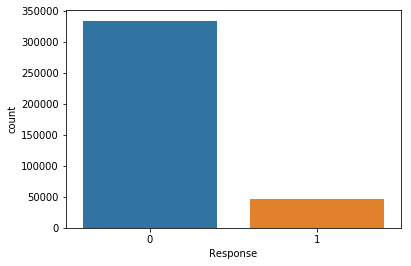

In [7]:
#Target Variable Response
sns.countplot(df.Response)

In [8]:
df.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

### Age Distribution of Customers

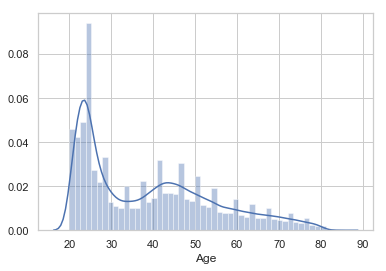

In [9]:
sns.set(style='whitegrid')
sns.distplot(df.Age)

### Gender vs Response

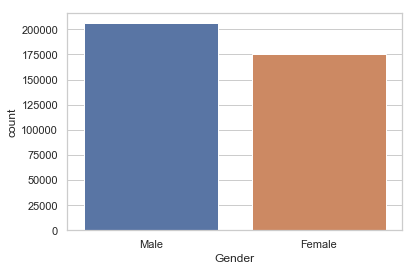

In [10]:
sns.countplot(df.Gender)

In [11]:
df2 = df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

In [12]:
df2

,Gender,Response,count
0,Female,0,156835
1,Female,1,18185
2,Male,0,177564
3,Male,1,28525


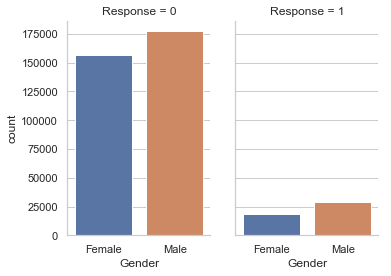

In [13]:
g = sns.catplot(x="Gender", y="count",col="Response",
                data=df2, kind="bar",
                height=4, aspect=.7);

### Driving licence vs Response

In [14]:
df3 = df.groupby(['Driving_License','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df3

,Driving_License,Response,count
0,0,0,771
1,0,1,41
2,1,0,333628
3,1,1,46669


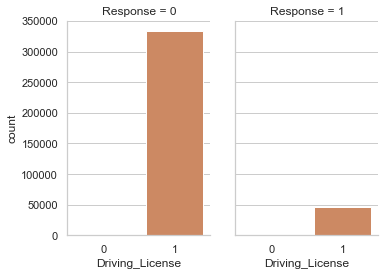

In [15]:
d = sns.catplot(x="Driving_License", y="count",col="Response",
                data=df3, kind="bar",
                height=4, aspect=.7);

### Previously Insured vs Response

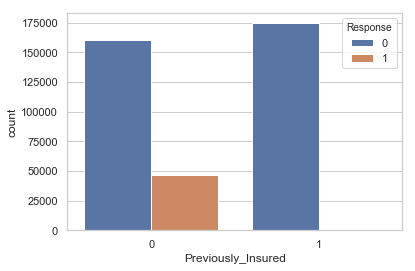

In [16]:
sns.countplot(x='Previously_Insured', hue='Response', data=df)

### Vehicle Age distribution

In [17]:
df['Vehicle_Age'].unique()             

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

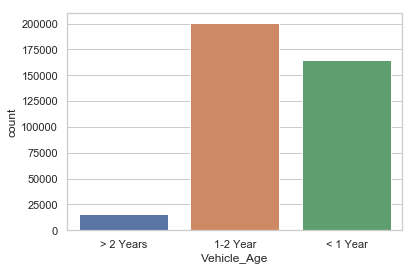

In [18]:
sns.countplot(df.Vehicle_Age)

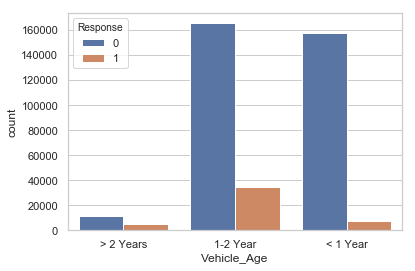

In [19]:
# Response vs Vehicle_age
sns.countplot(x='Vehicle_Age', hue='Response', data=df)

### Customers having Vehicle damage

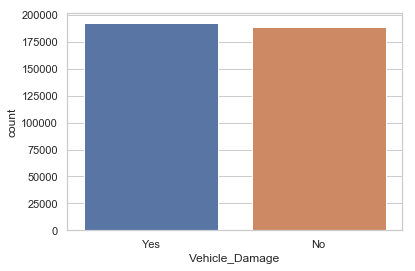

In [20]:
sns.countplot(df.Vehicle_Damage)

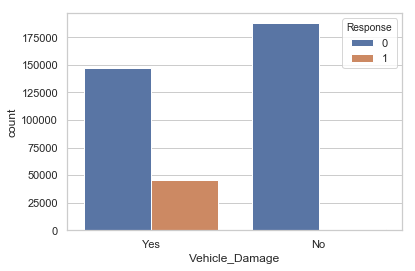

In [21]:
# Vehicle damage vs Response
sns.countplot(x='Vehicle_Damage', hue='Response', data=df)

### Annual premium Distribution

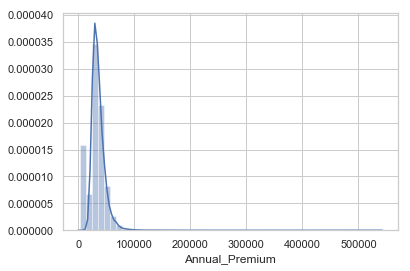

In [22]:
sns.distplot(df.Annual_Premium)

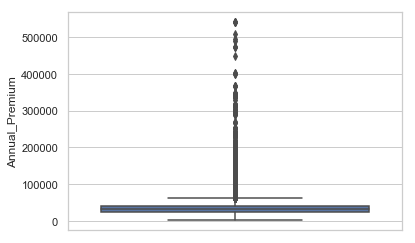

In [23]:
sns.boxplot(y = 'Annual_Premium', data =df)

### Vintage distribution

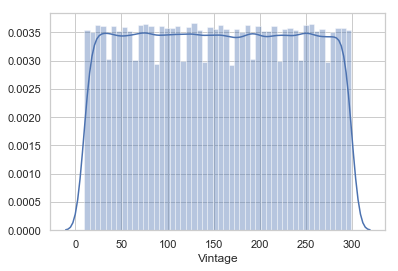

In [24]:
sns.distplot(df.Vintage)

## Data Preprocessing

In [25]:
num_feat = ['Age', 'Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured',
            'Vehicle_Age_lt_1_year','Vehicle_Age_gt_2_year','Vehicle_Damage',
            'Region_Code','Policy_Sales_Channel']

### Categorical Features

In [26]:
# 1.Gender

df['Gender'] = df['Gender'].map({'Female':0, 'Male':1}).astype(int)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [27]:
df['Gender'].dtype

dtype('int32')

In [28]:
# 2.Vehicle_Age will be handled by One Hot Encoding

Vehicle_age = pd.get_dummies(df['Vehicle_Age'], drop_first = True)
Vehicle_age.head()

,< 1 Year,> 2 Years
0,0,1
1,0,0
2,0,1
3,1,0
4,1,0


In [29]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes':1 ,'No': 0}).astype(int)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


### Remove unwanted features id, Vehicle_Age and concat with dummy variables

In [30]:
train = df.drop(['id','Vehicle_Age'], axis=1)

In [31]:
train = pd.concat([train,Vehicle_age], axis=1)
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,< 1 Year,> 2 Years
0,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,1
1,1,76,1,3.0,0,0,33536.0,26.0,183,0,0,0
2,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,1
3,1,21,1,11.0,1,0,28619.0,152.0,203,0,1,0
4,0,29,1,41.0,1,0,27496.0,152.0,39,0,1,0


In [32]:
train = train.rename(columns = {'< 1 Year':'Vehicle_Age_lt_1_year',
                               '> 2 Years':'Vehicle_Age_gt_2_year'})
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_year,Vehicle_Age_gt_2_year
0,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,1
1,1,76,1,3.0,0,0,33536.0,26.0,183,0,0,0
2,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,1
3,1,21,1,11.0,1,0,28619.0,152.0,203,0,1,0
4,0,29,1,41.0,1,0,27496.0,152.0,39,0,1,0


In [33]:
# For numerical features, using feature scaling to scale down the values

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()

train[num_feat] = ss.fit_transform(train[num_feat])

mm = MinMaxScaler()
train[['Annual_Premium']] = mm.fit_transform(train[['Annual_Premium']])

In [34]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_year,Vehicle_Age_gt_2_year
0,1,0.333777,1,28.0,0,1,0.070366,26.0,0.748795,1,0,1
1,1,2.396751,1,3.0,0,0,0.057496,26.0,0.342443,0,0,0
2,1,0.527181,1,28.0,0,1,0.066347,26.0,-1.521998,1,0,1
3,1,-1.148985,1,11.0,1,0,0.048348,152.0,0.581474,0,1,0
4,0,-0.633242,1,41.0,1,0,0.046259,152.0,-1.378580,0,1,0


In [35]:
# Changing the data type of categorical features as string 
for column in cat_feat:
    train[column] = train[column].astype('str')

### Correlation of each feature with Target

In [36]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_year,Vehicle_Age_gt_2_year
0,1,0.333777,1,28.0,0,1,0.070366,26.0,0.748795,1,0,1
1,1,2.396751,1,3.0,0,0,0.057496,26.0,0.342443,0,0,0
2,1,0.527181,1,28.0,0,1,0.066347,26.0,-1.521998,1,0,1
3,1,-1.148985,1,11.0,1,0,0.048348,152.0,0.581474,0,1,0
4,0,-0.633242,1,41.0,1,0,0.046259,152.0,-1.378580,0,1,0


### Same operations will be performed on test data

In [37]:
test = pd.read_csv('F:/Data science projects/Insurance cross sell prediction/test.csv')
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [38]:
test['Gender'] = test['Gender'].map({'Female':0, 'Male':1}).astype(int)
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,1,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,1,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,1,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,1,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [39]:
Vehicle_age = pd.get_dummies(test['Vehicle_Age'], drop_first = True)
Vehicle_age.head()

,< 1 Year,> 2 Years
0,1,0
1,0,0
2,0,0
3,1,0
4,1,0


In [40]:
test['Vehicle_Damage'] = test['Vehicle_Damage'].map({'Yes':1 ,'No': 0}).astype(int)
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11.0,1,< 1 Year,0,35786.0,152.0,53
1,381111,1,40,1,28.0,0,1-2 Year,1,33762.0,7.0,111
2,381112,1,47,1,28.0,0,1-2 Year,1,40050.0,124.0,199
3,381113,1,24,1,27.0,1,< 1 Year,1,37356.0,152.0,187
4,381114,1,27,1,28.0,1,< 1 Year,0,59097.0,152.0,297


In [41]:
test = test.drop(['id','Vehicle_Age'], axis=1)
test = pd.concat([test,Vehicle_age], axis=1)
test = test.rename(columns = {'< 1 Year':'Vehicle_Age_lt_1_year',
                               '> 2 Years':'Vehicle_Age_gt_2_year'})

test[num_feat] = ss.fit_transform(test[num_feat])

test[['Annual_Premium']] = mm.fit_transform(test[['Annual_Premium']])


In [42]:
for column in cat_feat:
    test[column] = test[column].astype('str')

In [43]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_year,Vehicle_Age_gt_2_year
0,1,-0.890089,1,11.0,1,0,0.070633,152.0,-1.211054,1,0
1,1,0.079795,1,28.0,0,1,0.066321,7.0,-0.517782,0,0
2,1,0.532408,1,28.0,0,1,0.079717,124.0,0.534079,0,0
3,1,-0.954748,1,27.0,1,1,0.073978,152.0,0.390643,1,0
4,1,-0.760771,1,28.0,1,0,0.120293,152.0,1.705469,1,0


### Model Building

In [44]:
from sklearn.model_selection import train_test_split

X = train.drop(['Response'], axis= 1)
y = train.Response

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 )

In [45]:
X_train.shape

(304887, 11)

In [46]:
X_test.shape

(76222, 11)

### Model Evaluation

### 1. Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix,precision_recall_curve, auc, roc_curve, recall_score, classification_report 

In [48]:
Rf_clf = RandomForestClassifier()

In [49]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

model = RandomizedSearchCV(estimator = Rf_clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 16.8min finished


RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, 4, 5, 6, 7, 10], 'min_samples_leaf': [4, 6, 8], 'min_samples_split': [5, 7, 10], 'n_estimators': [300]},
          pre_dispatch='2*n_jobs', random_state=101, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [50]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.88      1.00      0.93     66846
          1       0.00      0.00      0.00      9376

avg / total       0.77      0.88      0.82     76222



Populating the interactive namespace from numpy and matplotlib


C:\Users\Nikita\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


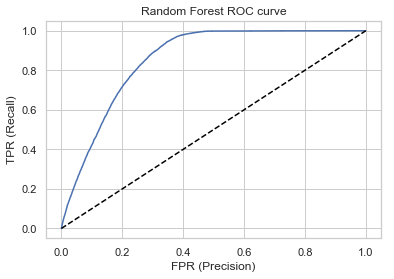

Area under curve (AUC):  0.8552435115814058


In [54]:
%pylab inline
y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('Random Forest ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [53]:
roc_auc_score(y_test, y_score)

0.8552435115814058

### Accuracy with RandomForest classifier is 85.53%